In [60]:
#! /usr/bin/env python

# Load useful modules
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


# 1. Mean as a random variable

## 1.1 Normal distribution

--------------------
CLT predicted mean 0.0
computed mean 0.0011831023505072039
--------------------
CLT predicted standard deviation 0.044721359549995794
computed standard deviation 0.04463977517101298
--------------------
 
--------
D’Agostino’s K^2 Test
--------
Statistics=0.938, p=0.626
Sample looks Gaussian (fail to reject H0)


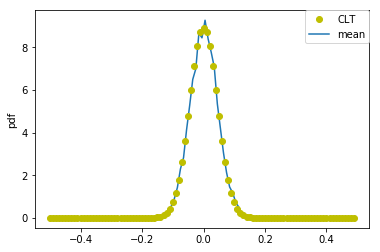

In [61]:
def normhistogram(u,bins):
    pdf, _ = np.histogram(u,bins)
    pdf = pdf / ((bins[2]-bins[1])*len(u))
    return pdf

########################################

mu = []
nsamp = 4000
n = 500

##########################################
# Generate nsamp samples each containing n random values
# and store the mean of the n ramdom values for each sample

for i in range(nsamp):
    x = np.random.randn(n)
    mu.append(x.mean())

#plot a pdf of the means

bins = np.arange(-.5,.5,0.01)
pdf = normhistogram(mu,bins)
p2,  = plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-');

############################################


'''
According to the CLT theorem the distribution of the means should be a gaussian 
centered on the expected value for the mean and with a standard deviation equal to true_std/sqrt(n))
'''

#CLT prediction (normal distribution with std = true_std/sqrt(n))
mean_CLT = 0.
sig_CLT = 1./np.sqrt(n)

p1,  = plt.plot(bins,1./np.sqrt(2*sig_CLT**2*np.pi)*np.exp(-(bins-0)**2/(2*sig_CLT**2)),'oy',linewidth=2);
plt.ylabel('pdf'); plt.legend([p1,p2],['CLT','mean'],borderaxespad=0.)


######################
print '--------------------'
print 'CLT predicted mean', mean_CLT
print 'computed mean',np.mean(mu)
print '--------------------'
print 'CLT predicted standard deviation', 1./np.sqrt(n)
print 'computed standard deviation',np.std(mu)
print '--------------------'

# We check that the distribution constructed from the nsamp means follow the expected distribition

####
print ' '
print '--------'
print 'D’Agostino’s K^2 Test'
print '--------'
from scipy.stats import normaltest
stat, p = normaltest(mu)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    

In [62]:
# additional normality tests
####

print '--------'
print 'Shapiro'
print '--------'
from scipy.stats import shapiro
stat, p = shapiro(mu)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

######
print ' '
print '--------'
print 'Anderson'
print '--------'
from scipy.stats import anderson
# normality test
result = anderson(mu)
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

--------
Shapiro
--------
Statistics=0.999, p=0.314
Sample looks Gaussian (fail to reject H0)
 
--------
Anderson
--------
Statistic: 0.175
15.000: 0.575, data looks normal (fail to reject H0)
10.000: 0.655, data looks normal (fail to reject H0)
5.000: 0.786, data looks normal (fail to reject H0)
2.500: 0.917, data looks normal (fail to reject H0)
1.000: 1.091, data looks normal (fail to reject H0)


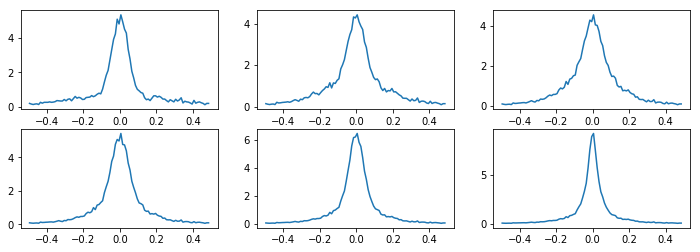

In [63]:
# 4. Check how the pdf and standard deviation σx ̄ vary with n.
########################################

plt.figure(figsize=(12.0,4.0))

ip=0
for n in [10,50,100,500,1000,5000]:
    ip+=1
    plt.subplot(2,3,ip);
    ##########################################
    # Generate nsamp samples each containing n random values
    # and store the mean of the n ramdom values for each sample

    for i in range(nsamp):
        x = np.random.randn(n)
        mu.append(x.mean())

    #plot a pdf of the means

    bins = np.arange(-.5,.5,0.01)
    pdf = normhistogram(mu,bins)
    p2,  = plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-');

    ############################################



## 1.2 chi-square distribution

In [64]:
y =np.random.rand(n)

print(gammaincinv(10,0.5))

9.668714614714128


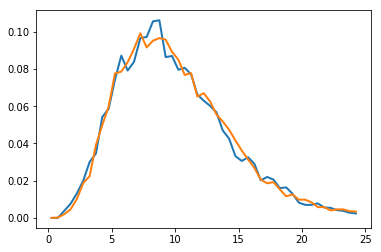

In [65]:
from scipy.special import gammaincinv
from scipy.special import erfinv

###########################
# random generator
def generator(pdfname,n,df=0.):

    # random number generator (between 0 and 1 with constant pdf)
    y =np.random.rand(n)
    
    # apply the inverse CDF of the distribution you want
    if pdfname=='cauchy':
        x = np.tan( np.pi * (y-.5) )
    
    elif pdfname=='chisquare':
        x = 2 * gammaincinv(df/2,y)
    
    elif pdfname=='exponential':
        x = - np.log( 1-y )
        
    elif pdfname=='normal':
        x = np.sqrt(2)*erfinv( 2*y-1 );

    return x

###########################


# plot a chi_square distribution
n = 10000
df = 10
bins0 = np.arange(0.,25.,0.5)

# using numpy function
chi = np.random.chisquare(df,n)
pdf0 = normhistogram(chi,bins0)
p0,  = plt.plot(0.5*(bins0[:-1]+bins0[1:]),pdf0,'-',linewidth=2);

# using random generator
chi = generator('chisquare',n,df)
pdf1 = normhistogram(chi,bins0)
p1,  = plt.plot(0.5*(bins0[:-1]+bins0[1:]),pdf1,'-',linewidth=2);

--------------------
CLT predicted mean 10
computed mean 10.000002588362902
--------------------
CLT predicted standard deviation 0.2
computed standard deviation 0.2003033660301189
--------------------
--------
D’Agostino’s K^2 Test
--------
Statistics=25.235, p=0.000
Sample does not look Gaussian (reject H0)


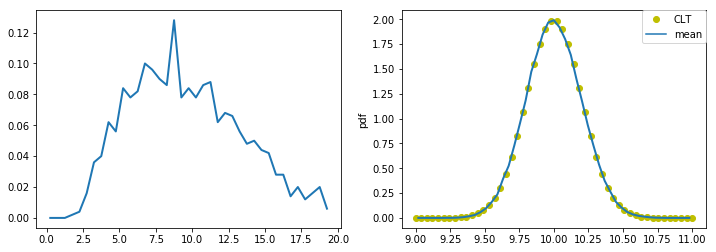

In [66]:
#######################################

mu = []
nsamp = 100000
n = 1000

df = 10

true_mu = df
true_std = np.sqrt(2*df)

bins0 = np.arange(0.,20.,0.5)

#######################################
# plot the pdf of a random variable following a chi-square distribution
plt.figure(figsize=(12.0,4.0))
plt.subplot(1,2,1)
chi = np.random.chisquare(df,n)
pdf0 = normhistogram(chi,bins0)
p0,  = plt.plot(0.5*(bins0[:-1]+bins0[1:]),pdf0,'-',linewidth=2);
#######################################

n = 500
# We do the same as in 1.1 but with a random variable following a chi-square distribution
for i in range(nsamp):
    chi = np.random.chisquare(df,n)
    mu.append(chi.mean())
    
bins = np.linspace(9.,11., 50)
pdf = normhistogram(mu,bins)

'''
According to the CLT theorem the distribution of the means should be a gaussian as previously
centered on the expected value for the mean and with a standard deviation equal to true_std/sqrt(n))
even if the random variable is not normal
'''

plt.subplot(1,2,2)
#CLT prediction (normal distribution with std = true_std/sqrt(n))
sig_CLT = true_std/np.sqrt(n)
p1,  = plt.plot(bins,1./np.sqrt(2*sig_CLT**2*np.pi)*np.exp(-(bins-true_mu)**2/(2*sig_CLT**2)),'oy',linewidth=1);
plt.ylabel('pdf'); plt.legend([p1,p2],['CLT','mean'],borderaxespad=0.)

#results from averaging over nsamp samples
p2,  = plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-',linewidth=2);



######################
print '--------------------'
print 'CLT predicted mean', df
print 'computed mean',np.mean(mu)
print '--------------------'
print 'CLT predicted standard deviation', np.sqrt(2*df)/np.sqrt(n)
print 'computed standard deviation',np.std(mu)
print '--------------------'


####
print '--------'
print 'D’Agostino’s K^2 Test'
print '--------'
from scipy.stats import normaltest
stat, p = normaltest(mu)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    

In [67]:
'''n=1000
df=5
#######################################
# plot the pdf of a random variable following a chi-square distribution
plt.figure(figsize=(12.0,4.0))
plt.subplot(1,2,1)
chi = np.random.chisquare(df,n)
pdf0 = normhistogram(chi,bins0)
p0,  = plt.plot(0.5*(bins0[:-1]+bins0[1:]),pdf0,'-',linewidth=2);

plt.subplot(1,2,2)
chi2 = np.zeros((n,1))

for i in range(df):
    chi2 += np.random.randn(n,1)**2
    
pdf1 = normhistogram(chi2,bins0)
p0,  = plt.plot(0.5*(bins0[:-1]+bins0[1:]),pdf1,'-o',linewidth=2);
#######################################'''

"n=1000\ndf=5\n#######################################\n# plot the pdf of a random variable following a chi-square distribution\nplt.figure(figsize=(12.0,4.0))\nplt.subplot(1,2,1)\nchi = np.random.chisquare(df,n)\npdf0 = normhistogram(chi,bins0)\np0,  = plt.plot(0.5*(bins0[:-1]+bins0[1:]),pdf0,'-',linewidth=2);\n\nplt.subplot(1,2,2)\nchi2 = np.zeros((n,1))\n\nfor i in range(df):\n    chi2 += np.random.randn(n,1)**2\n    \npdf1 = normhistogram(chi2,bins0)\np0,  = plt.plot(0.5*(bins0[:-1]+bins0[1:]),pdf1,'-o',linewidth=2);\n#######################################"

In [68]:
'''
n = 10000

bins0 = np.arange(-10.,10.,0.1)
plt.figure(figsize=(12.0,8.0))
#######################################
# plot the pdf of a random variable following a Cauchy distribution
plt.subplot(2,2,1)
chi = np.random.standard_cauchy(n)
pdf0 = normhistogram(chi,bins0)
p0,  = plt.plot(0.5*(bins0[:-1]+bins0[1:]),pdf0,'-',linewidth=2);
plt.ylabel('pdf Cauchy'); plt.xlabel('bins'); 
#######################################

print np.std(np.random.standard_cauchy(10000))


#######################################
'''

"\nn = 10000\n\nbins0 = np.arange(-10.,10.,0.1)\nplt.figure(figsize=(12.0,8.0))\n#######################################\n# plot the pdf of a random variable following a Cauchy distribution\nplt.subplot(2,2,1)\nchi = np.random.standard_cauchy(n)\npdf0 = normhistogram(chi,bins0)\np0,  = plt.plot(0.5*(bins0[:-1]+bins0[1:]),pdf0,'-',linewidth=2);\nplt.ylabel('pdf Cauchy'); plt.xlabel('bins'); \n#######################################\n\nprint np.std(np.random.standard_cauchy(10000))\n\n\n#######################################\n"

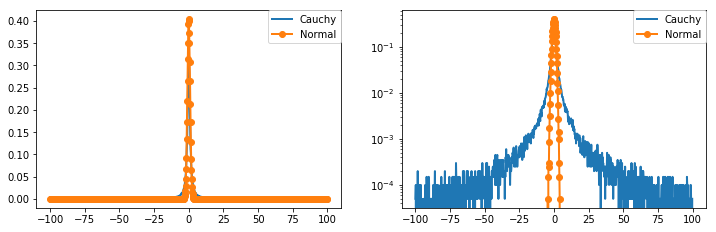

In [75]:

n = 100000
bins0 = np.arange(-100.,100.,0.2)
plt.figure(figsize=(12.0,8.0))

#######################################
# plot the pdf of a random variable following a Cauchy distribution

chi = np.random.standard_cauchy(n)
chi1 = np.random.randn(n)

pdf0 = normhistogram(chi,bins0)
pdf1 = normhistogram(chi1,bins0)


plt.subplot(2,2,1)

p0,  = plt.plot(0.5*(bins0[:-1]+bins0[1:]),pdf0,'-',linewidth=2);
p1,  = plt.plot(0.5*(bins0[:-1]+bins0[1:]),pdf1,'-o',linewidth=2);

plt.legend([p0,p1],['Cauchy','Normal'],borderaxespad=0.)


plt.subplot(2,2,2)

p0,  = plt.semilogy(0.5*(bins0[:-1]+bins0[1:]),pdf0,'-',linewidth=2);
p1,  = plt.semilogy(0.5*(bins0[:-1]+bins0[1:]),pdf1,'-o',linewidth=2);

plt.legend([p0,p1],['Cauchy','Normal'],borderaxespad=0.)
#######################################



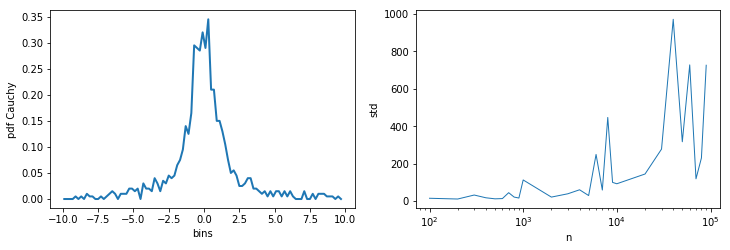

In [70]:
# 1.3 Cauchy distribution

n = 1000
bins0 = np.arange(-10.,10.,0.2)
plt.figure(figsize=(12.0,8.0))

#######################################
# plot the pdf of a random variable following a Cauchy distribution
plt.subplot(2,2,1)
chi = np.random.standard_cauchy(n)
#chi = np.random.randn(n)

pdf0 = normhistogram(chi,bins0)
p0,  = plt.plot(0.5*(bins0[:-1]+bins0[1:]),pdf0,'-',linewidth=2);
plt.ylabel('pdf Cauchy'); plt.xlabel('bins'); 

#######################################

#######################################
# Check how the standard deviation of a Cauchy distribution diverges when n increases 
# (instead of converging toward a finite vlue as a normal distribution)
plt.subplot(2,2,2)
cau_std = []

n_range = [i*10**exp for exp in range(2, 5) for i in range(1, 10)]
for n in n_range:
    cau = np.random.standard_cauchy(n)
    #cau = np.random.randn(df,n)
    cau_std.append(cau.std())

    

p1,  = plt.semilogx(n_range,cau_std,'-',linewidth=1);
plt.ylabel('std'); plt.xlabel('n'); 



--------------------
CLT predicted mean undefined
computed mean -1.014751279170358
--------------------
CLT predicted standard deviation undefined
computed standard deviation 92.71994452123175
--------------------
--------
D’Agostino’s K^2 Test
--------
Statistics=33024.975, p=0.000
Sample does not look Gaussian (reject H0)


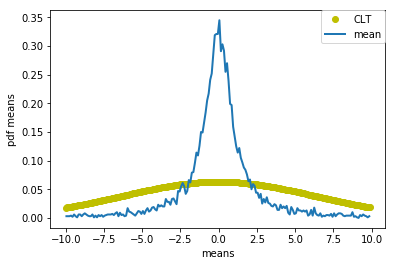

In [71]:
#######################################


mu = []
mystd = []
true_mu = 0.

n = 500
nsamp = 10000
# We do the same as in 1.1 but with a random variable following a chi-square distribution
for i in range(nsamp):
    chi = np.random.standard_cauchy(n)
    mu.append(chi.mean())
    mystd.append(chi.std())  
    
bins = np.arange(-10.,10.,0.1)
pdf = normhistogram(mu,bins)

#

true_std = np.mean(mystd)

'''
The Chauchy distribution does not have a finite standard deviation and the CLT theorem fails
'''

plt.subplot(1,1,1)
#CLT prediction (normal distribution with std = true_std/sqrt(n))
sig_CLT = true_std/np.sqrt(n)
p1,  = plt.plot(bins,1./np.sqrt(2*sig_CLT**2*np.pi)*np.exp(-(bins-true_mu)**2/(2*sig_CLT**2)),'oy',linewidth=1);
plt.ylabel('pdf means'); plt.xlabel('means');  plt.legend([p1,p2],['CLT','mean'],borderaxespad=0.)

#results from averaging over nsamp samples
p2,  = plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-',linewidth=2);


######################
print '--------------------'
print 'CLT predicted mean', 'undefined'
print 'computed mean',np.mean(mu)
print '--------------------'
print 'CLT predicted standard deviation', 'undefined'
print 'computed standard deviation',np.std(mu)
print '--------------------'


####
print '--------'
print 'D’Agostino’s K^2 Test'
print '--------'
from scipy.stats import normaltest
stat, p = normaltest(mu)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    

# 2. Standard deviation as a random variable

--------
D’Agostino’s K^2 Test
--------
Statistics=17.759, p=0.000
Sample does not look Gaussian (reject H0)


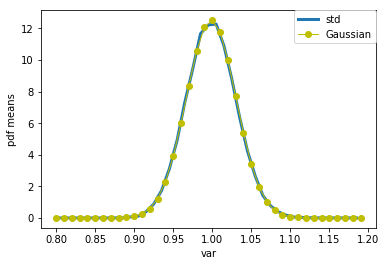

In [72]:
std_samples = []
mu_samples = []
nsamp = 40000
n = 500

# Generate nsamp samples each containing n random values
# and store the standard deviation of the n ramdom values for each sample
for i in range(nsamp):
    x = np.random.randn(n)
    std_samples.append(x.std())
    mu_samples.append(x.mean())

#plot a pdf of the means
bins = np.arange(1.-0.2,1.+0.2,0.01)
pdf = normhistogram(std_samples,bins)
p0,  = plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-',linewidth=3);


sig_CLT = np.std(std_samples)
mean_CLT = np.mean(std_samples)

p1,  = plt.plot(bins,1./np.sqrt(2*sig_CLT**2*np.pi)*np.exp(-(bins-mean_CLT)**2/(2*sig_CLT**2)),'-oy',linewidth=1);
plt.ylabel('pdf means'); plt.xlabel('var');  

plt.legend([p0,p1,p2],['std','Gaussian'],borderaxespad=0.)

'''
There is no theorem for the distribution of stds

This is not a gaussian in general (even if it looks like it, normal statstical tests usually fail)
'''

####
print '--------'
print 'D’Agostino’s K^2 Test'
print '--------'
from scipy.stats import normaltest
stat, p = normaltest(std_samples)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    
   

# 2 bis. Variance as a random variable

--------
D’Agostino’s K^2 Test
--------
Statistics=121.926, p=0.000
Sample does not look Gaussian (reject H0)
--------
chisquare Test
--------
Statistics=40059.561, p=0.414
Sample follows chi-square (fail to reject H0)


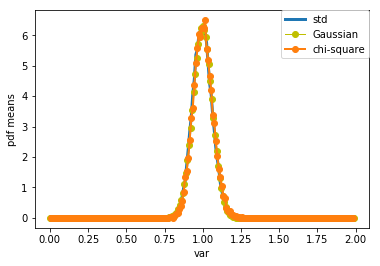

In [73]:
# 1.1 Normal distribution
var_samples = []
mu_samples = []
nsamp = 40000
n = 500

# Generate nsamp samples each containing n random values
# and store the variance of the n ramdom values for each sample
for i in range(nsamp):
    x = np.random.randn(n)
    var_samples.append(x.var())
    mu_samples.append(x.mean())

#plot a pdf of the means
bins = np.arange(0.,2.,0.01)
pdf = normhistogram(var_samples,bins)
p0,  = plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-',linewidth=3);


sig_CLT = np.std(var_samples)
mean_CLT = np.mean(var_samples)

p1,  = plt.plot(bins,1./np.sqrt(2*sig_CLT**2*np.pi)*np.exp(-(bins-mean_CLT)**2/(2*sig_CLT**2)),'-oy',linewidth=1);
plt.ylabel('pdf means'); plt.xlabel('var');  

chi = np.random.chisquare(n-1,10000)/(n-1)
pdf0 = normhistogram(chi,bins)
p2,  = plt.plot(0.5*(bins[:-1]+bins[1:]),pdf0,'-o',linewidth=2);

plt.legend([p0,p1,p2],['std','Gaussian','chi-square'],borderaxespad=0.)

'''
There is no theorem for the distribution of variance

But we know that if the random variable is gaussian, 
the distributions of variances of nsamp samples will be a chi-square
'''

####
print '--------'
print 'D’Agostino’s K^2 Test'
print '--------'
from scipy.stats import normaltest
stat, p = normaltest(var_samples)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')
    

####
print '--------'
print 'chisquare Test'
print '--------'
from scipy.stats import chisquare
stat, p = chisquare(mu_samples,np.random.chisquare(n-1,nsamp)/(n-1))
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample follows chi-square (fail to reject H0)')
else:
	print('Sample does not follow chi-square (reject H0)')
    
    
    

In [74]:
from scipy.stats import normaltest

#test if a distribution is Gaussian
def test(mu_samples,alpha=0.05):
    print "null hypothesis: x comes from a normal distribution"
    k,p = normaltest(mu_samples)
    print "pvalue =", p
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected")
    else:
        print("The null hypothesis cannot be rejected")
    print(" ")
    
print "means"
test(mu_samples)
print "standard deviation"
test(std_samples)

n=100
print "normal distribution"
test(np.random.randn(n))
print "chi_square"
test(np.random.chisquare(10.,n))
print "Cauchy"
test(np.random.standard_cauchy(n))





means
null hypothesis: x comes from a normal distribution
pvalue = 0.23796906153416822
The null hypothesis cannot be rejected
 
standard deviation
null hypothesis: x comes from a normal distribution
pvalue = 0.0001392433298817072
The null hypothesis can be rejected
 
normal distribution
null hypothesis: x comes from a normal distribution
pvalue = 0.18890710038091219
The null hypothesis cannot be rejected
 
chi_square
null hypothesis: x comes from a normal distribution
pvalue = 0.21792823737304423
The null hypothesis cannot be rejected
 
Cauchy
null hypothesis: x comes from a normal distribution
pvalue = 2.3585529416903005e-42
The null hypothesis can be rejected
 


# 3. Intermittency

In [109]:
import scipy.io
turb = scipy.io.loadmat('turbulence2D_with_boundaries.mat')

(-0.005, 0.005)

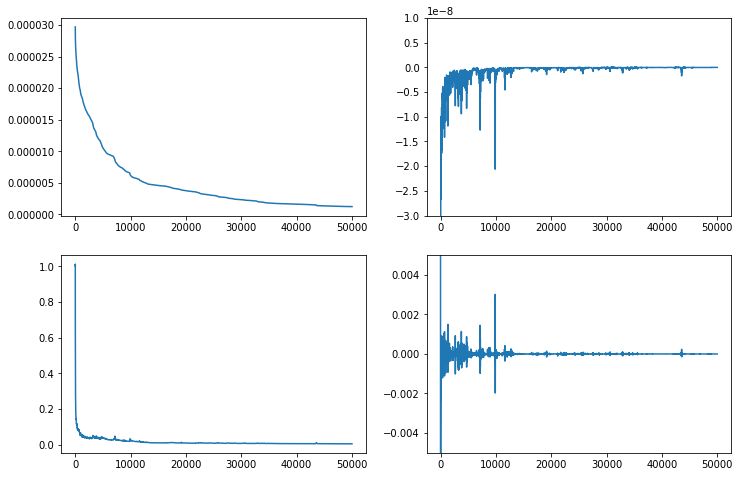

In [110]:
plt.figure(figsize=(12.0,8.0))
plt.subplot(2,2,1); plt.plot(turb['time'][0],turb['K'][0]); 
plt.subplot(2,2,2); plt.plot(turb['time'][0],turb['dKdt'][0]); plt.ylim([-3e-8,1e-8])
plt.subplot(2,2,3); plt.plot(turb['time'][0],turb['V'][0]); 
plt.subplot(2,2,4); plt.plot(turb['time'][0],turb['dVdt'][0]); plt.ylim([-0.5e-2,0.5e-2])


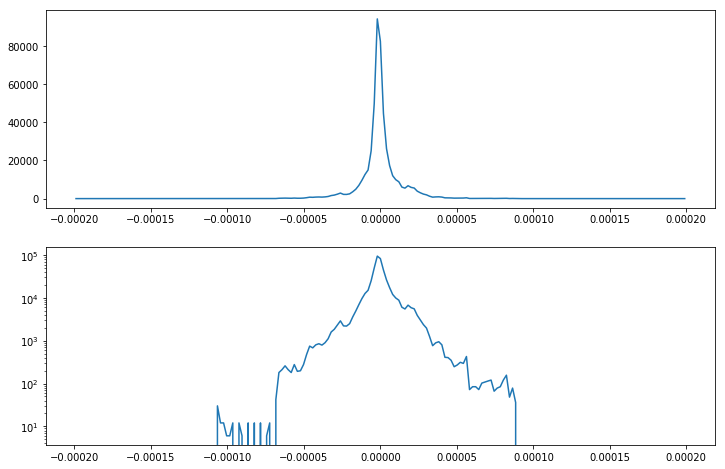

In [111]:
dVdt = turb['dVdt'][0]
time = turb['time'][0]

x = dVdt[np.logical_and(3e4>time,time>2e4)]

##########
# alternative method
imin = np.min(np.where(time>2e4))
imax = np.max(np.where(time<3e4))
x2 = dVdt[imin:imax]
##########


bins = np.linspace(-2e-4,2e-4,200)
pdf = normhistogram(x,bins)


plt.figure(figsize=(12.0,8.0))
plt.subplot(2,1,1);
p1,  = plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-');

plt.subplot(2,1,2);
p1,  = plt.semilogy(0.5*(bins[:-1]+bins[1:]),pdf,'-');


In [113]:
from scipy.stats import skew,kurtosis

print x.mean(),x.std(),skew(x),kurtosis(x)

-1.9154435531256887e-07 1.2774272135983981e-05 0.250176812801 7.75518477407


null hypothesis: x comes from a normal distribution
pvalue = 0.0
The null hypothesis can be rejected
 


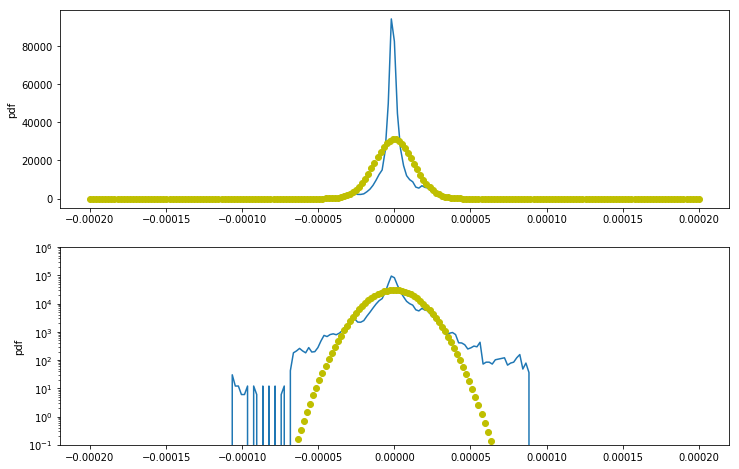

In [117]:
sig = x.std()
mu = x.mean()

plt.figure(figsize=(12.0,8.0))
plt.subplot(2,1,1);
p1,  = plt.plot(0.5*(bins[:-1]+bins[1:]),pdf,'-');
p2,  = plt.plot(bins,1./np.sqrt(2*sig**2*np.pi)*np.exp(-(bins-mu)**2/(2*sig**2)),'oy',linewidth=1);
plt.ylabel('pdf'); 

plt.subplot(2,1,2);
p1,  = plt.semilogy(0.5*(bins[:-1]+bins[1:]),pdf,'-');
p2,  = plt.semilogy(bins,1./np.sqrt(2*sig**2*np.pi)*np.exp(-(bins-mu)**2/(2*sig**2)),'oy',linewidth=1);
plt.ylim([1e-1,1e6])
plt.ylabel('pdf'); 

test(x)


(-0.0001, 0.0001)

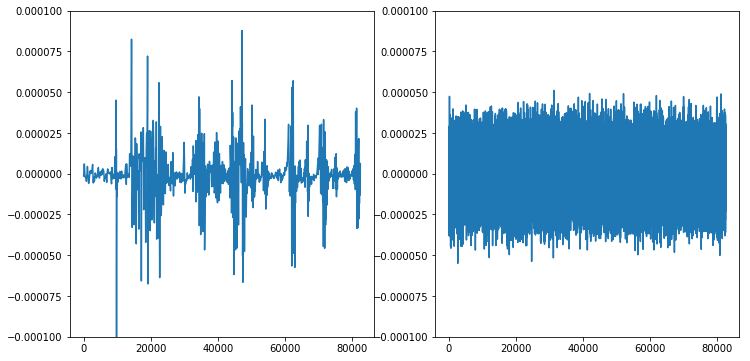

In [118]:
plt.figure(figsize=(12.0,6.0))
plt.subplot(1,2,1);
plt.plot(x); plt.ylim([-1e-4, 1e-4])
plt.subplot(1,2,2);
plt.plot(x.mean()+np.random.randn(len(x))*x.std())
plt.ylim([-1e-4, 1e-4])